In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
pd.set_option('display.max_rows',1000)
%matplotlib inline

In [ ]:
df_train = pd.read_csv('/content/fraudTrain.csv')
df_test = pd.read_csv('/content/fraudTest.csv')

In [ ]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,19476.000000,1.947500e+04,19475.000000,19475.000000,19475.000000,19475.000000,1.947500e+04,1.947500e+04,19475.000000,19475.000000,19475.000000
mean,9737.500000,4.275559e+17,70.519926,48949.064852,38.499702,-90.362035,9.084999e+04,1.325880e+09,38.501656,-90.358590,0.006778
std,5622.381257,1.324022e+18,150.263839,27007.709723,5.140518,14.111404,3.028157e+05,2.885798e+05,5.166165,14.129925,0.082051
min,0.000000,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.042510,-166.629875,0.000000
25%,4868.750000,1.800446e+14,9.630000,26041.000000,34.668900,-96.917700,7.440000e+02,1.325644e+09,34.753383,-97.038188,0.000000
50%,9737.500000,3.521417e+15,48.250000,48174.000000,39.303600,-87.591700,2.471000e+03,1.325897e+09,39.310831,-87.484562,0.000000
75%,14606.250000,4.653879e+15,83.075000,72042.000000,41.811400,-80.158000,2.112500e+04,1.326084e+09,41.881962,-80.189566,0.000000
max,19475.000000,4.992346e+18,11872.210000,99783.000000,65.689900,-67.950300,2.906700e+06,1.326401e+09,66.645176,-66.967742,1.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19476 entries, 0 to 19475
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19476 non-null  int64  
 1   trans_date_trans_time  19476 non-null  object 
 2   cc_num                 19475 non-null  float64
 3   merchant               19475 non-null  object 
 4   category               19475 non-null  object 
 5   amt                    19475 non-null  float64
 6   first                  19475 non-null  object 
 7   last                   19475 non-null  object 
 8   gender                 19475 non-null  object 
 9   street                 19475 non-null  object 
 10  city                   19475 non-null  object 
 11  state                  19475 non-null  object 
 12  zip                    19475 non-null  float64
 13  lat                    19475 non-null  float64
 14  long                   19475 non-null  float64
 15  ci

In [ ]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   1
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64

In [ ]:
print(df_train.shape)

(19476, 23)


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15582 entries, 0 to 15581
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15582 non-null  int64  
 1   trans_date_trans_time  15582 non-null  object 
 2   cc_num                 15582 non-null  int64  
 3   merchant               15582 non-null  object 
 4   category               15582 non-null  object 
 5   amt                    15582 non-null  float64
 6   first                  15582 non-null  object 
 7   last                   15582 non-null  object 
 8   gender                 15582 non-null  object 
 9   street                 15582 non-null  object 
 10  city                   15582 non-null  object 
 11  state                  15582 non-null  object 
 12  zip                    15582 non-null  int64  
 13  lat                    15582 non-null  float64
 14  long                   15582 non-null  float64
 15  ci

In [ ]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,15582.000000,1.558200e+04,15582.000000,15582.000000,15582.000000,15582.000000,1.558200e+04,1.558200e+04,15582.000000,15581.000000,15581.000000
mean,7790.500000,4.170574e+17,67.953438,48543.409447,38.515453,-90.053311,9.277153e+04,1.372010e+09,38.508582,-90.052234,0.003016
std,4498.280283,1.310273e+18,138.602156,26758.935531,5.094100,13.580491,3.174108e+05,1.289608e+05,5.130652,13.589005,0.054841
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.163455,-166.464422,0.000000
25%,3895.250000,1.800468e+14,9.390000,26041.000000,34.544400,-96.701000,7.610000e+02,1.371908e+09,34.672618,-96.726579,0.000000
50%,7790.500000,3.519233e+15,45.635000,48038.500000,39.371600,-87.349000,2.526000e+03,1.371992e+09,39.373863,-87.305194,0.000000
75%,11685.750000,4.634956e+15,81.487500,72011.000000,42.014400,-80.158000,2.113400e+04,1.372112e+09,41.974959,-80.201133,0.000000
max,15581.000000,4.992346e+18,6600.440000,99783.000000,65.689900,-67.950300,2.906700e+06,1.372270e+09,66.669356,-66.960745,1.000000


In [ ]:
df_test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0.0


In [ ]:
X = df_train.drop('is_fraud', axis=1)
y = df_train['is_fraud']

In [ ]:
df_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [ ]:
scaler = StandardScaler()

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
X_train_cleaned = X_train.dropna()
y_train_cleaned = y_train[X_train_cleaned.index]

rf_classifier.fit(X_train_cleaned, y_train_cleaned)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 0.9966632443531828
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3876
         1.0       0.77      0.50      0.61        20

    accuracy                           1.00      3896
   macro avg       0.88      0.75      0.80      3896
weighted avg       1.00      1.00      1.00      3896

[[3873    3]
 [  10   10]]


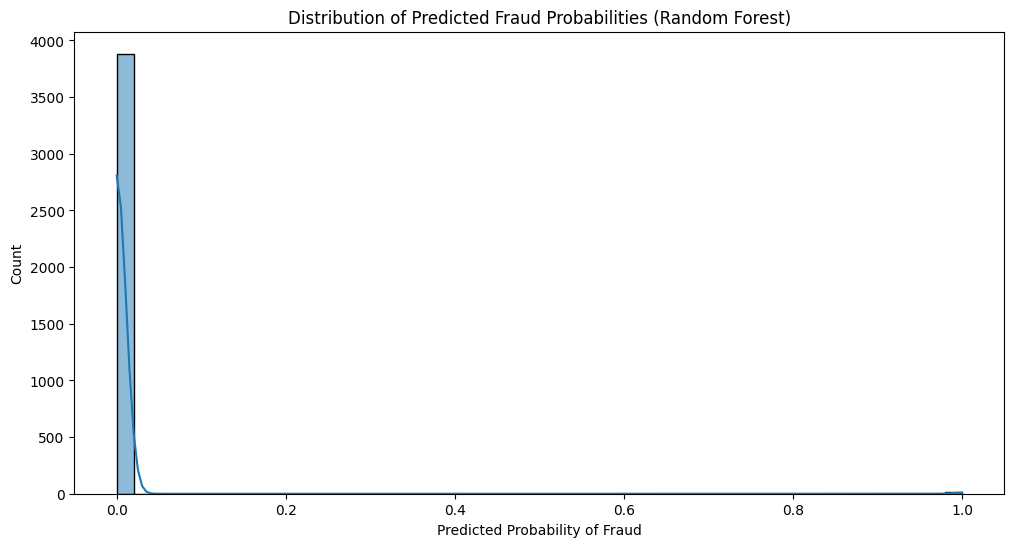

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(y_pred_rf, bins=50, kde=True)
plt.xlabel("Predicted Probability of Fraud")
plt.ylabel("Count")
plt.title("Distribution of Predicted Fraud Probabilities (Random Forest)")
plt.show()

In [ ]:
fig = px.histogram(x=y_pred_rf, nbins=50, title="Predicted Fraud Probabilities (Random Forest)")
fig.update_layout(xaxis_title="Predicted Probability of Fraud", yaxis_title="Count")
fig.show()